<a href="https://colab.research.google.com/github/juliobento9131/IT304S_Trabalho_Parte_2/blob/main/IT304S_TRABALHO_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IT304S: Contratação de Energia para Grandes Consumidores.
##Prof. Dr. Luiz Carlos Pereira da Silva
## Trabalho avaliativo  - Parte 2

# Definição de ciência de dados 

A ciência de dados pode ser definida como um conjunto de técnicas de analise de dados para obter e apresentar informações úteis para um usuario. 

# Metodologia

Uma metodologia muito utilizado para analisar dados é o chamado ``CRISP-DM", por suas siglas em inglês: Cross-Industry Standard Process for Data Mining. O CRISP-DM tem seis etapas que são:

* **Business Understanding:** Definição dos objetivos, declaração do problema, * * pergunta de interesse.
* **Data Understanding:** Utilização de nosso conhecimento para coletar os dados.
* **Data Preparation:** Manipulação de dados para a eliminação de outliers e dados faltantes.
* **Modeling:** Modelo ou abordagem utilizado para estudar o comportamento de nosso sistema a partir de nossos dados.
* **Evaluation:** Avaliação dos resultados obtidos, no contexto se são de ajuda para responder nossa pergunta de interesse.
* **Deployment:** Disponibilizar o análise de dados.

# Business Understanding

* **Definição dos objetivos:** O objetivo do presente notebook é apresentar as variaveis disponíveis no banco de dados UFCA.xlsx.
* **Declaração do problema:** O arquivo UFCA.xlsx, contém as informações disponíveis das planilhas elétricas da UFCA, precisamos de fazer um analize exploratorio dos dados para conhecer os dados disponíveis da UFCA.
* **Perguntas de Interesse:**
Há dados faltantes?

# Avaliação dos dados extraídos de faturas de energia  elétrica para definição de contratação de energia


## - Importação dos dados do google drive



In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## - Clonagem para repositório do github

In [16]:
!git clone https://github.com/juliobento9131/IT304S_Trabalho_Parte_2.git

Cloning into 'IT304S_Trabalho_Parte_2'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


## - Leitura do arquivo em excel e preparação dos dados

In [17]:
import pandas as pd

In [18]:
import numpy as np

In [19]:
import missingno as msno

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [20]:
abas_de_excel =  pd.ExcelFile("/content/drive/Shareddrives/IT304S - Comercialização de Energia Elétrica para Grandes Clientes/Projeto/Planilhas - Universidades/Grupo 15 - UFFS/Preencher_universidade.xlsx")
abas_de_excel.sheet_names

['Apresentação', 'UC1', 'UC2', 'UC3', 'UC6', 'UC4', 'UC5']

## - Data Understanding: Unidade Consumidora 1

In [21]:
UC1 = abas_de_excel.parse("UC1")
UC1.shape

(12, 30)

In [22]:
UC1.head()

,DATA,ANO,MÊS,PERÍODO,PIS/PASEP,COFINS,ICMS,DEMANDA_CONTRATADA_P,DEMANDA_CONTRATADA_FP,DEMANDA_REGISTRADA_P,DEMANDA_REGISTRADA_FP,DEMANDA_ISENTA_P,DEMANDA_ISENTA_FP,TAR_TUSD_KW_P,TAR_TUSD_KW_FP,ENERGIA_PONTA,ENERGIA_FPONTA,TAR_TUSD_KWH_P,TAR_TUSD_KWH_FP,TAR_TE_KWH_P,TAR_TE_KWH_FP,REAT_KVAR_PONTA,REAT_KVAR_FPONTA,TAR_REAT_PONTA,TAR_REAT_FPONTA,Valor da Fatura,Consumo Total,Acrescimo_Bamar,Acrescimo_Bverm1,Acrescimo_Bverm2
0,2019-01-01,2019,1,31,0.0089,0.0415,0.3,NaN,250,NaN,168.00,NaN,NaN,NaN,13.47,3071,37200,0.9933,0.06265,0.40205,0.24992,0.144,0.0,0.26259,0.26259,28711.92,40271,0.00,0.0,0
1,2019-02-01,2019,2,29,0.0093,0.0438,0.3,NaN,250,NaN,142.08,NaN,NaN,NaN,13.47,3656,42006,0.9933,0.06265,0.40205,0.24992,0.000,0.0,0.26259,0.26259,31342.29,45662,0.00,0.0,0
2,2019-03-01,2019,3,30,0.0089,0.0414,0.3,NaN,250,NaN,182.40,NaN,NaN,NaN,13.47,6090,48707,0.9933,0.06265,0.40205,0.24992,0.000,0.0,0.26259,0.26259,35867.93,54797,0.00,0.0,0
3,2019-04-04,2019,4,28,0.0105,0.0480,0.3,NaN,250,NaN,203.52,NaN,NaN,NaN,13.47,7625,51393,0.9933,0.06265,0.40205,0.24992,0.000,0.0,0.26259,0.26259,44039.12,59018,0.00,0.0,0
4,2019-05-05,2019,5,33,0.0135,0.0626,0.3,NaN,250,NaN,213.12,NaN,NaN,NaN,13.47,7910,56664,0.9933,0.06265,0.40205,0.24992,0.000,0.0,0.26259,0.26259,48482.60,64574,468.76,0.0,0


## - Data Preparation: Unidade Consumidora 1

In [23]:
np.nan + np.nan

nan

In [24]:
np.nan == np.nan

False

In [25]:
np.isnan(np.nan)

True

In [26]:
data = []
for colm in UC1.columns[3:]:
  data.append([colm, UC1.shape[0]-UC1[colm].apply(np.isnan).sum(), UC1[colm].apply(np.isnan).sum(), (UC1[colm].apply(np.isnan).sum()/69)])
dados_faltantes = pd.DataFrame(data, columns=["Variavel", "Quantidade de dados Disponíveis", "Quantidade de dados Faltantes", "Percentagem de Dados Faltantes" ])
dados_faltantes = dados_faltantes[dados_faltantes["Quantidade de dados Faltantes"]>0].sort_values(by=['Quantidade de dados Faltantes'], ascending=False).reset_index(drop=True)
dados_faltantes['Percentagem de Dados Faltantes'] = dados_faltantes['Percentagem de Dados Faltantes'].astype(float).map("{:.2%}".format)
dados_faltantes

,Variavel,Quantidade de dados Disponíveis,Quantidade de dados Faltantes,Percentagem de Dados Faltantes
0,DEMANDA_CONTRATADA_P,0,12,17.39%
1,DEMANDA_REGISTRADA_P,0,12,17.39%
2,DEMANDA_ISENTA_P,0,12,17.39%
3,DEMANDA_ISENTA_FP,0,12,17.39%
4,TAR_TUSD_KW_P,0,12,17.39%


## - Visualização de Dados Faltantes: Unidade Consumidora 1

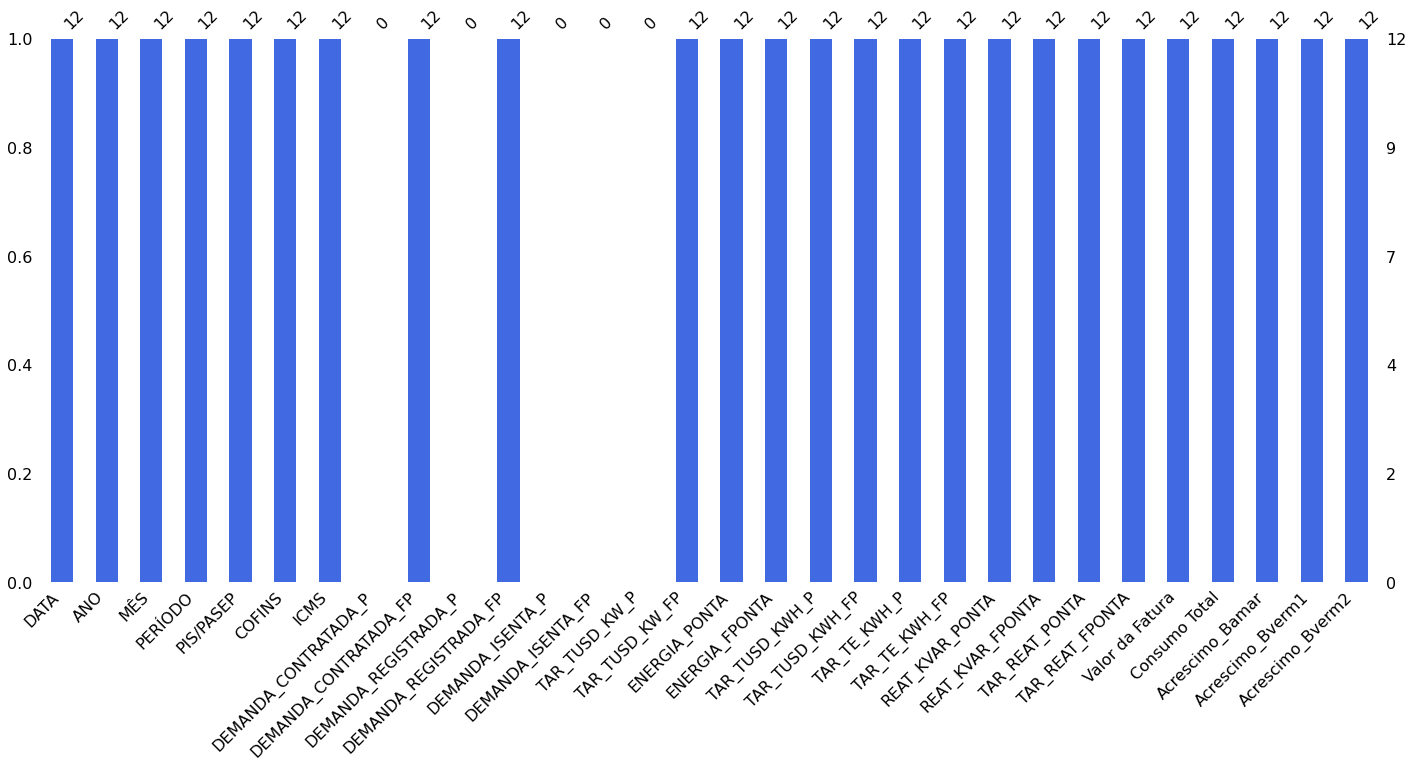

In [27]:
msno.bar(UC1, color="RoyalBlue") #para visualizar a integridade do datafram

## - Matriz de Dados Faltantes: Unidade Consumidora 1

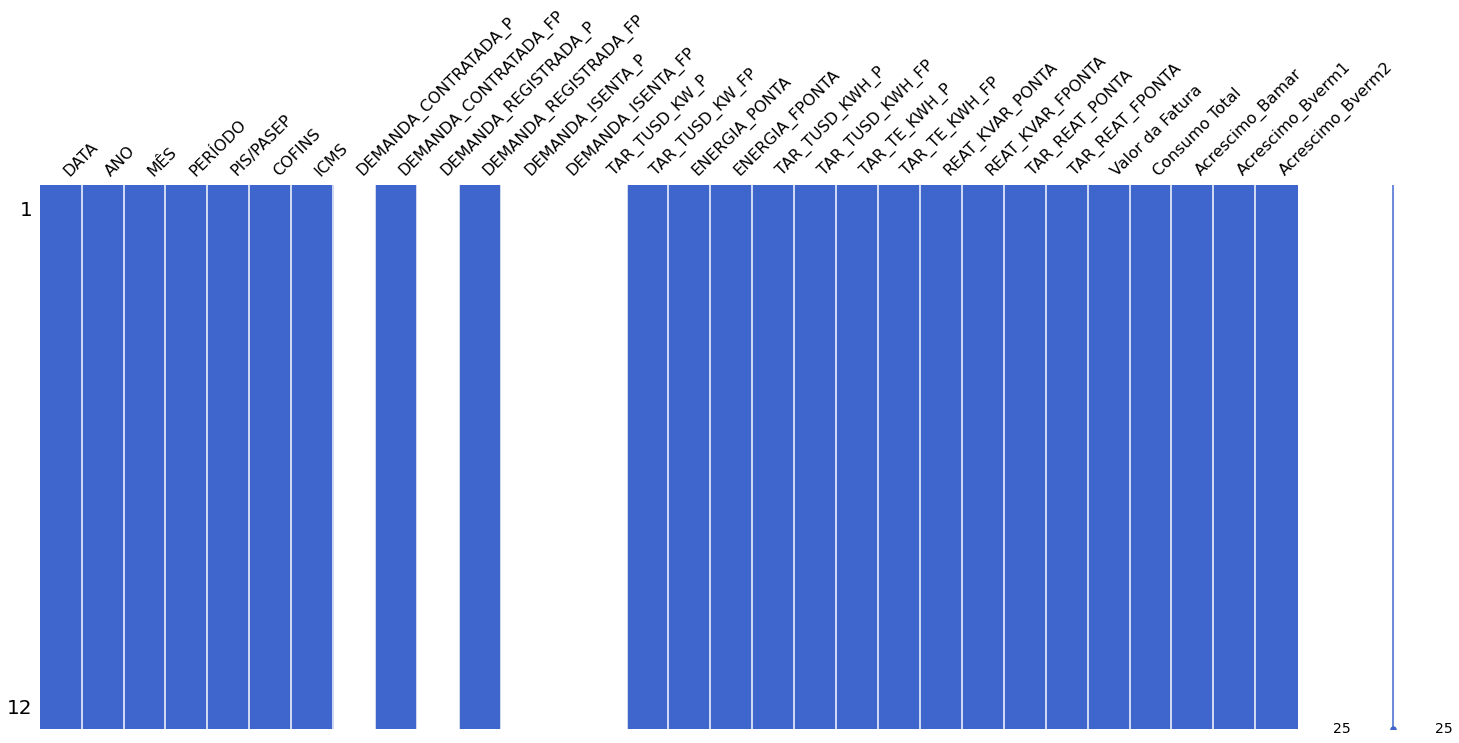

In [28]:
msno.matrix(UC1, color = (0.25,0.4,0.8))

## - Matriz de Correlação de Dados Faltantes: Unidade Consumidora 1

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:311: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:311: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


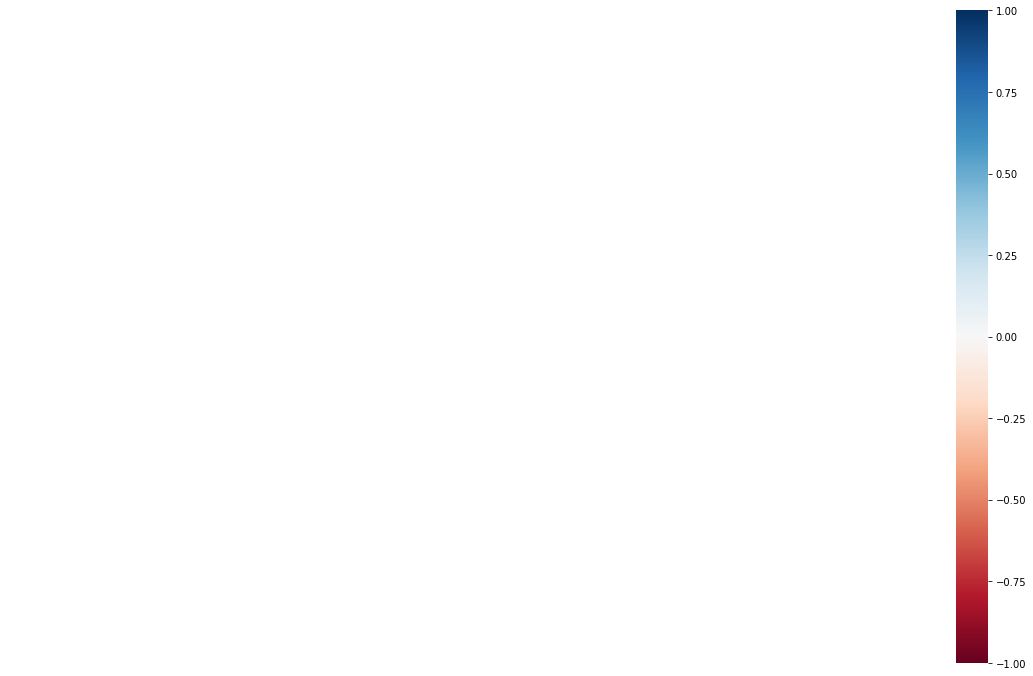

In [29]:
msno.heatmap(UC1)

## - Dendogram de Dados Faltantes: Unidade Consumidora 1

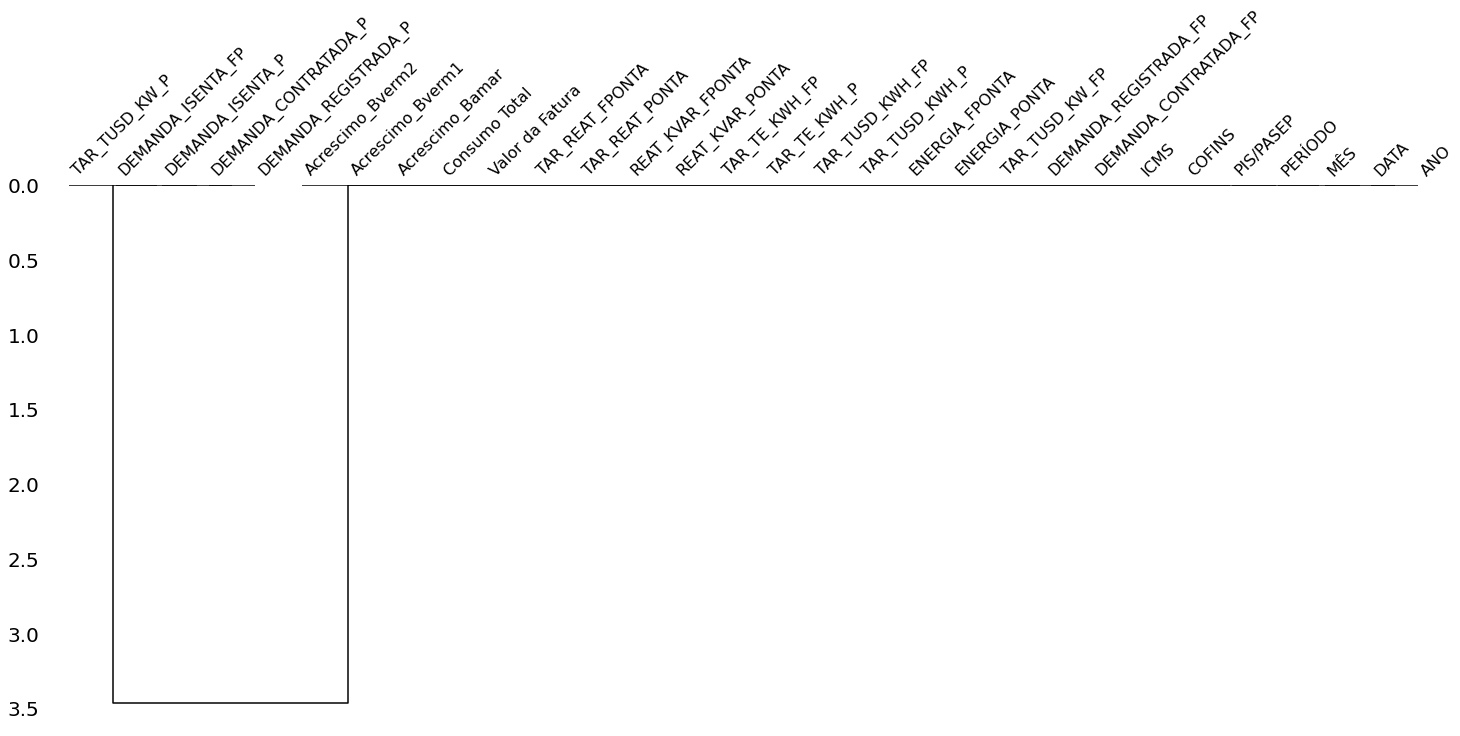

In [30]:
msno.dendrogram(UC1)

## - Eliminação de Dados Faltantes: Unidade Consumidora 1

In [33]:
UC1_df = UC1.drop(set(UC1.columns[UC1.isnull().mean() >0.5]), 1)
UC1_df.shape

(12, 25)

## - Visualização de Variaveis: Unidade Consumidora 1

ValueError: ignored

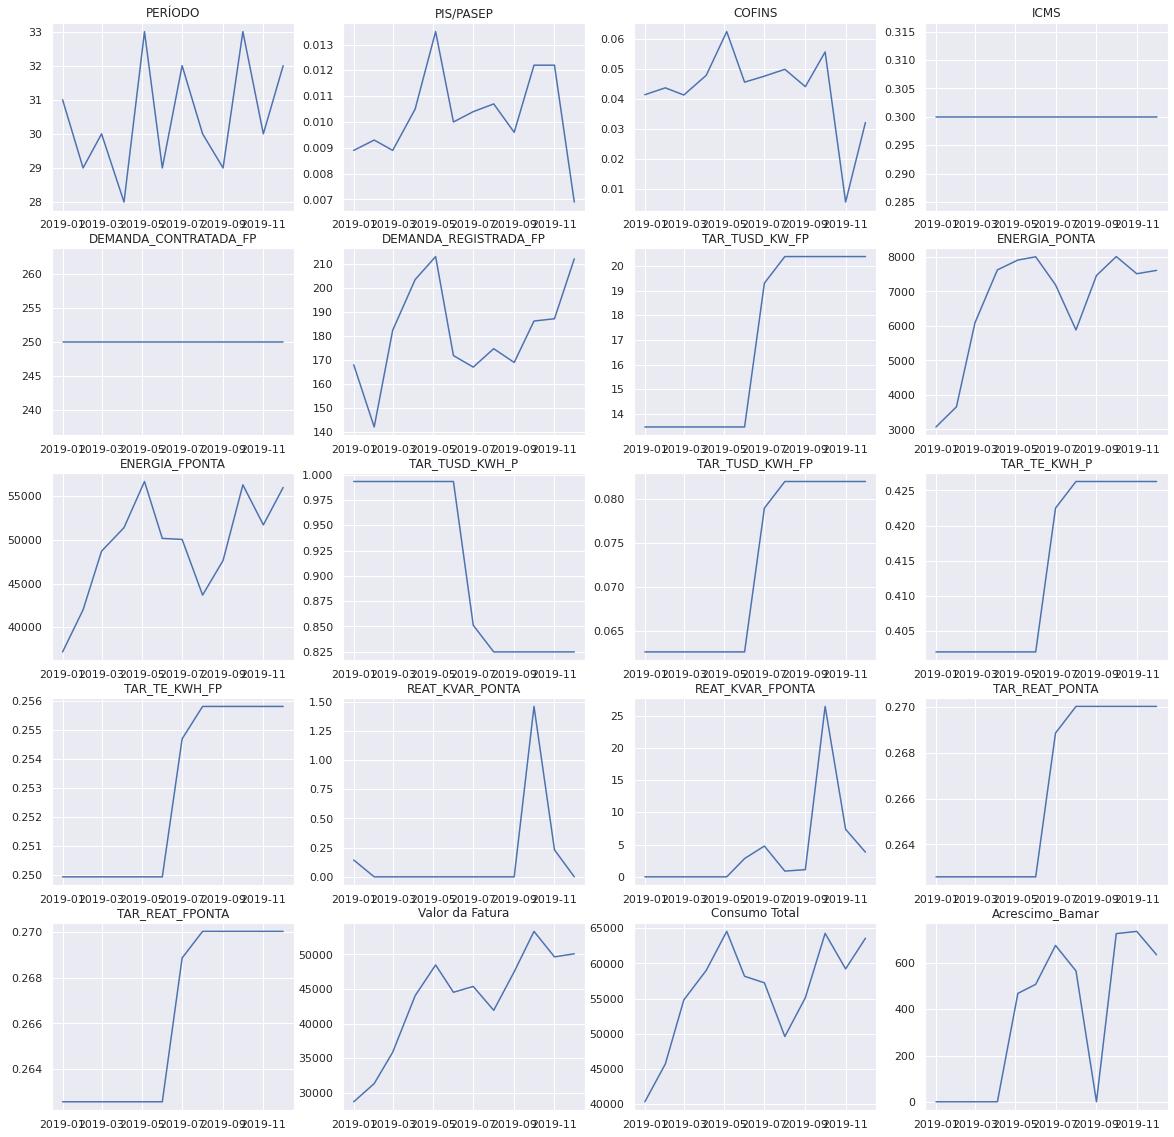

In [34]:
f, axs = plt.subplots(5, 4,figsize=(20,20))
for i,col in enumerate(UC1_df.columns[3:]):
  plt.subplot(5, 4, i+1)
  plt.title(col)
  plt.plot(UC1_df.DATA, UC1_df[col])

""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

## Será replicado o codigo para as outras UC posteriormente...

""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

 - Unidade consumidora 2

In [ ]:
UC2 = abas_de_excel.parse("UC2")
UC2.shape

In [ ]:
UC2.head()

 - Unidade consumidora 3

In [ ]:
UC3 = abas_de_excel.parse("UC3")
UC3.shape

In [ ]:
UC3.head()

 - Unidade consumidora 4

In [ ]:
UC4 = abas_de_excel.parse("UC4")
UC4.shape

In [ ]:
UC4.head()

 - Unidade consumidora 5

In [ ]:
UC5 = abas_de_excel.parse("UC5")
UC5.shape

In [ ]:
UC5.head()

 - Unidade consumidora 6

In [ ]:
UC6 = abas_de_excel.parse("UC6")
UC6.shape

In [ ]:
UC6.head()